In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

housing = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/House_Prices/train_houseprices.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
numerical = [
  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'
]
categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]

housing = housing[numerical + categorical]
housing.shape

(1460, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


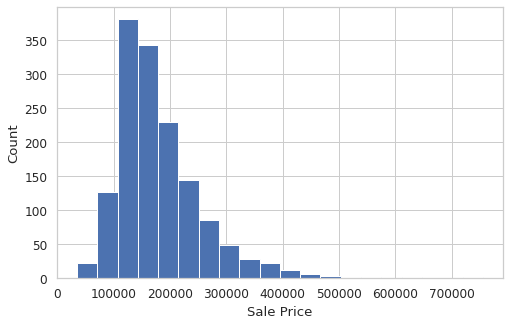

In [ ]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

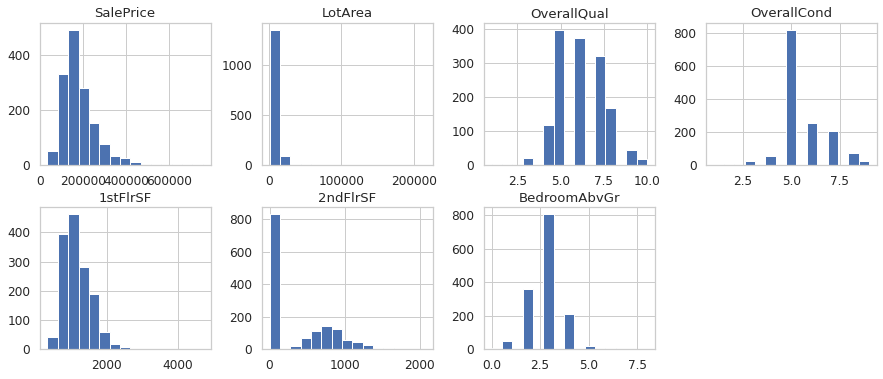

In [ ]:
housing[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


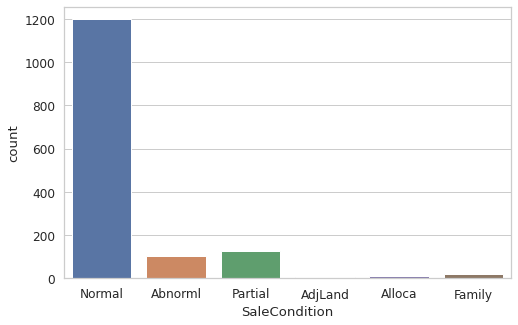

In [ ]:
sns.countplot(housing['SaleCondition']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

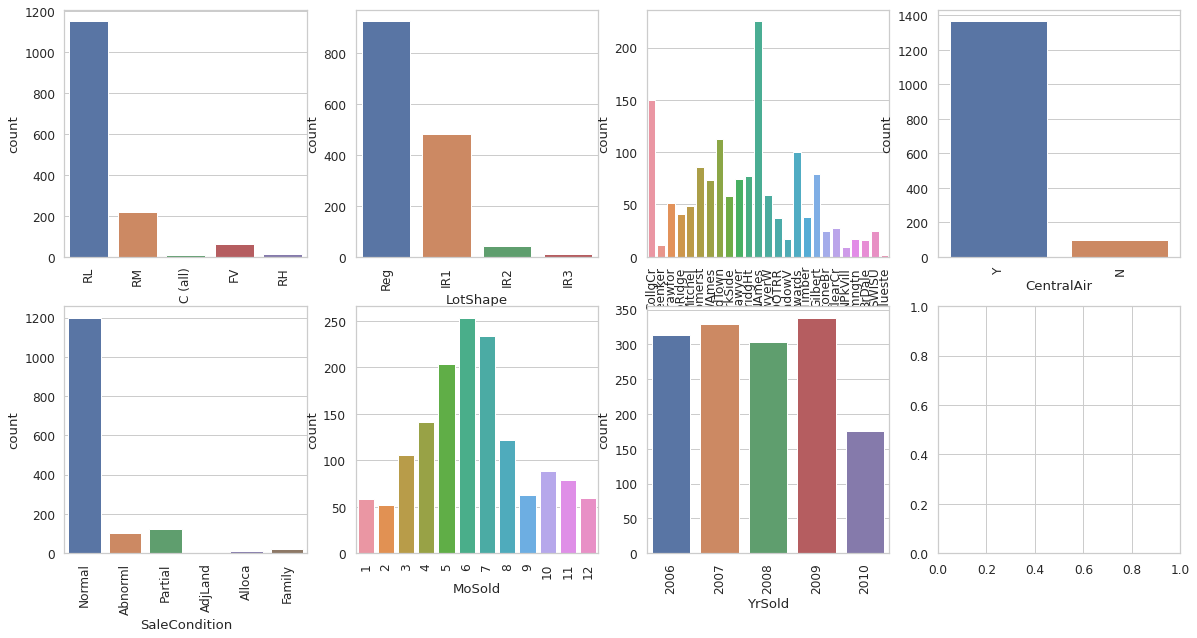

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:

housing[housing['YrSold'] == 2010].groupby('MoSold')['YrSold'].count()

MoSold
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: YrSold, dtype: int64

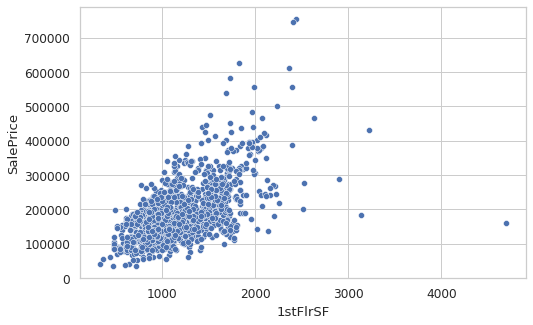

In [ ]:
sns.scatterplot(x=housing['1stFlrSF'], y=housing['SalePrice']);

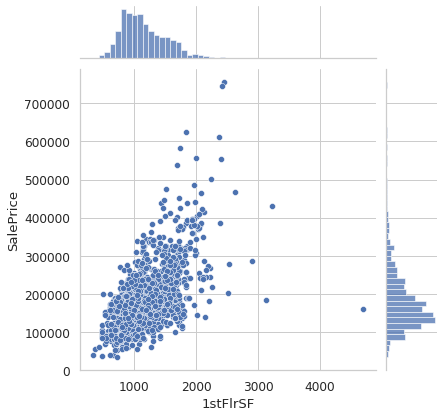

In [ ]:
sns.jointplot(x=housing['1stFlrSF'], y=housing['SalePrice']);

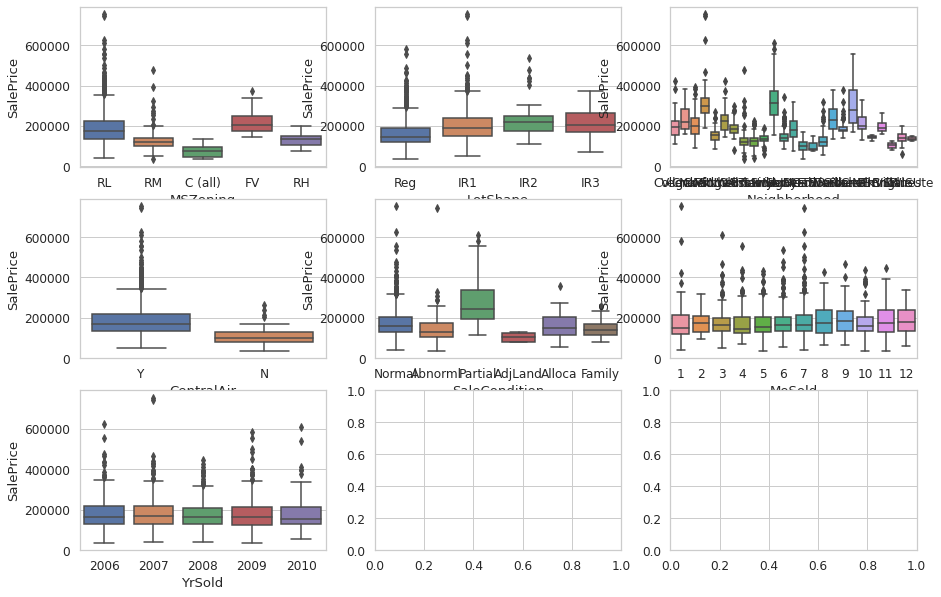

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

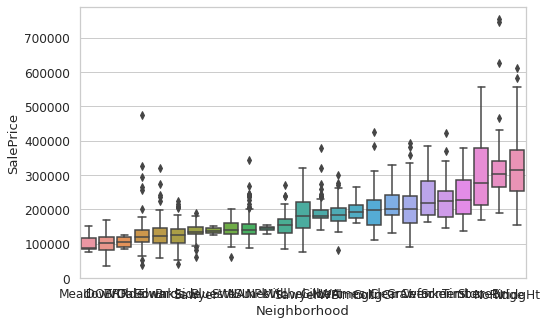

In [ ]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index))

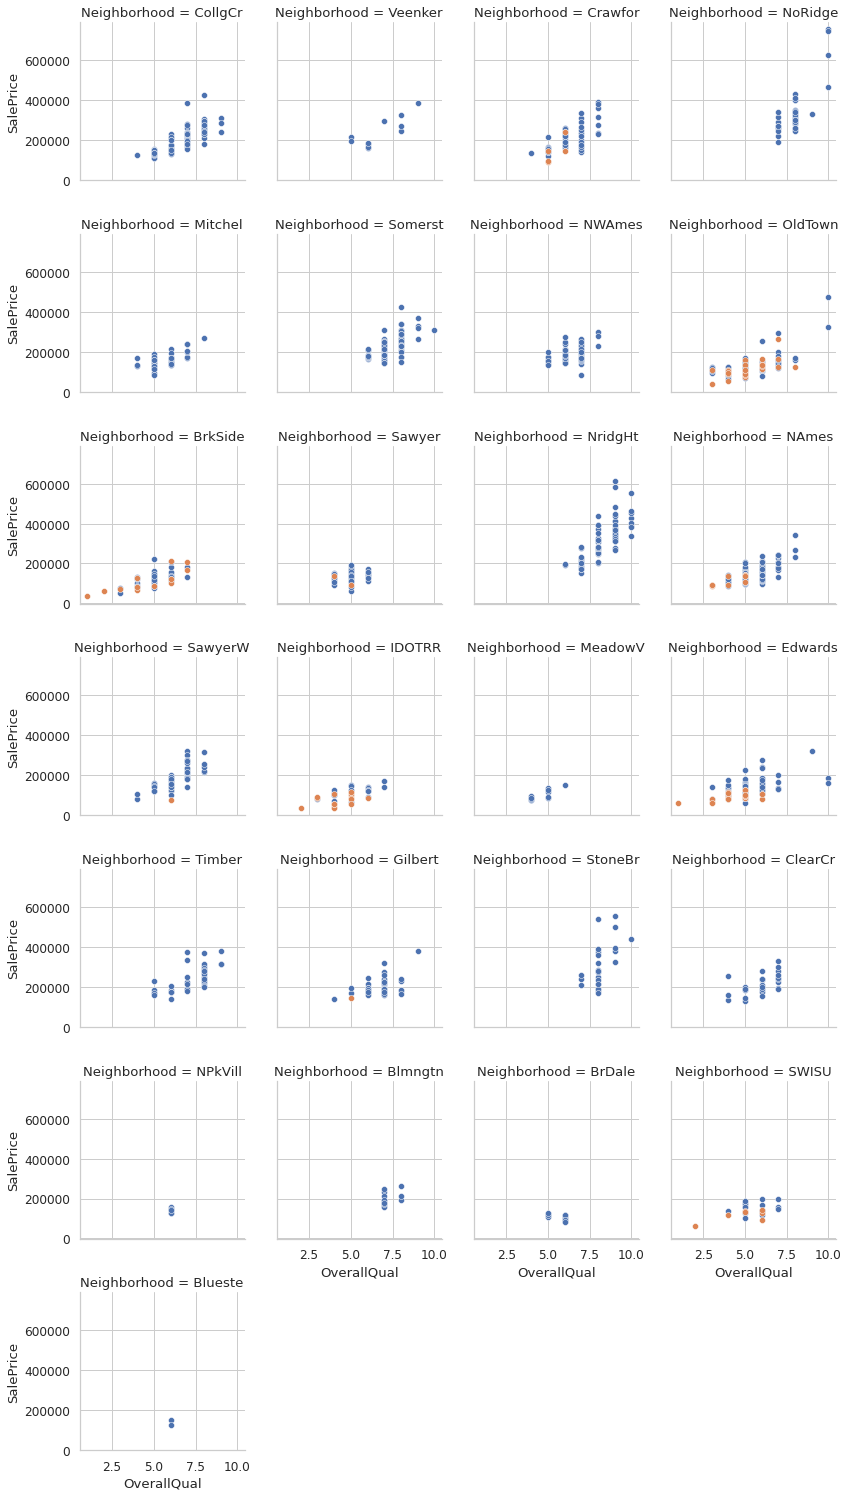

In [ ]:
cond_plot = sns.FacetGrid(data=housing, col='Neighborhood', hue='CentralAir', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice');